In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#data_path = r"\\wsl.localhost\Ubuntu\home\jarryd\project\cms-cls-tea\evaluation\output_evaluation\conc_versus_x.csv"
# data_path = './data/06_01_test.csv'
data_path = "./output_evaluation/conc_versus_x.csv"
data = pd.read_csv(data_path, names=['distance_from_margin', 'conc_slice'])

In [3]:
data

,distance_from_margin,conc_slice
0,0.000000,0.0
1,0.063492,0.0
2,0.126984,0.0
3,0.190476,0.0
4,0.253968,0.0
...,...,...
59,3.746032,0.0
60,3.809524,0.0
61,3.873016,0.0
62,3.936508,0.0


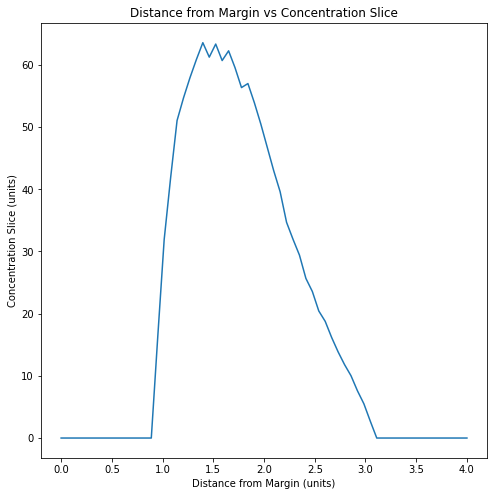

In [5]:
#data.plot('distance_from_margin', 'conc_slice')
title = 'Distance from Margin vs Concentration Slice'

plt.figure(figsize=(8,8))
plt.plot(data['distance_from_margin'], data['conc_slice'])
plt.xlabel('Distance from Margin (units)')
plt.ylabel('Concentration Slice (units)')
plt.title(title)

date_str = datetime.today().strftime('%Y_%m_%d')
plt.savefig('./figures/{}_{}.png'.format(date_str, title))

In [27]:
from os import listdir
from os.path import isfile, join

mypath = "./output_evaluation/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

pdf = pd.DataFrame(onlyfiles, columns=["files"])
pdf["t_points"] = pdf["files"].map(lambda x: int(x.replace("grid_diffuse_", "").replace("conc_versus_x.csv", "")))
pdf = pdf.sort_values("t_points").reset_index(drop=True)

In [29]:
pdf

,files,t_points
0,grid_diffuse_0conc_versus_x.csv,0
1,grid_diffuse_100conc_versus_x.csv,100
2,grid_diffuse_200conc_versus_x.csv,200
3,grid_diffuse_300conc_versus_x.csv,300
4,grid_diffuse_400conc_versus_x.csv,400
...,...,...
95,grid_diffuse_9500conc_versus_x.csv,9500
96,grid_diffuse_9600conc_versus_x.csv,9600
97,grid_diffuse_9700conc_versus_x.csv,9700
98,grid_diffuse_9800conc_versus_x.csv,9800


In [36]:
for i in range(pdf.shape[0]):
    file = pdf['files'].values[i]
    data = pd.read_csv("./output_evaluation/{}".format(file), names=['distance_from_margin', 'conc_slice'])
    t_iter = pdf['t_points'].values[i]
    title = 'Distance from Margin vs Concentration Slice' + '\n' + 't_iter={}'.format(t_iter)

    plt.figure(figsize=(8,8))
    plt.plot(data['distance_from_margin'], data['conc_slice'])
    plt.ylim([0, 80])
    plt.xlabel('Distance from Margin (units)')
    plt.ylabel('Concentration Slice (units)')
    plt.title(title)
    plt.savefig("./figures/test/{}.jpg".format(t_iter), bbox_inches='tight')
    plt.close()